In [ ]:
!pip install tensorflow opencv-python


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print('Training data shape:', train_images.shape)
print('Training data shape:', test_images.shape)
print('Number of training samples:', train_images.shape[0])
print('Number of test samples:', test_images.shape[0])

Training data shape: (50000, 32, 32, 3)
Training data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of test samples: 10000


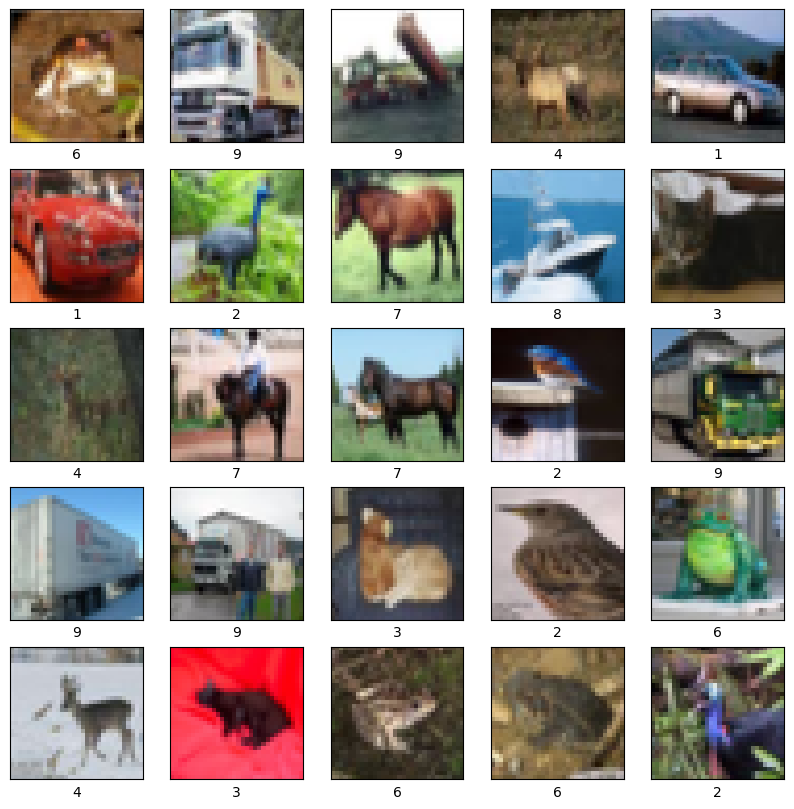

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i][0])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))


Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5959 - accuracy: 0.7899 - val_loss: 0.8690 - val_accuracy: 0.7096
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5592 - accuracy: 0.8013 - val_loss: 0.9032 - val_accuracy: 0.7102
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5315 - accuracy: 0.8118 - val_loss: 0.9111 - val_accuracy: 0.7129
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5028 - accuracy: 0.8216 - val_loss: 0.9314 - val_accuracy: 0.7132
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4767 - accuracy: 0.8308 - val_loss: 0.9721 - val_accuracy: 0.7113
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4470 - accuracy: 0.8406 - val_loss: 1.0338 - val_accuracy: 0.7101
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4270 - accuracy: 0.8480 - val_loss: 1.0418 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 1.6688 - accuracy: 0.6923 - 666ms/epoch - 2ms/step
Test accuracy: 0.692300021648407


In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [ ]:
model.save('cifar10_cnn_model.h5')
